# TRABAJO PRÁCTICO N° 3

Reutilizamos el codigo hecho para el TP1 y TP2:

In [1]:
import pandas as pd
datos_05 = pd.read_stata("usu_individual_T105.dta")
datos_25 = pd.read_excel("usu_individual_T125.xls")

In [2]:
# Ponemos en minuscula los nombres de cada base de datos para que las columnas tengan  el mismo nombre
datos_05.columns = datos_05.columns.str.lower()
datos_25.columns = datos_25.columns.str.lower()

In [3]:
# Filtrar por región
# Cambiar los valores de region en la base de datos 2005 a numero
region_dic = {
    "Gran Buenos Aires": 1,
    "NOA": 40,
    "NEA": 41,
    "Cuyo": 42,
    "Pampeana": 43,
    "Patagónica": 44
}

# Reemplaza los valores de texto por números en la misma columna
datos_05["region"] = datos_05["region"].replace(region_dic)

datos_05 = datos_05[datos_05["region"] == 40]
datos_25 = datos_25[datos_25["region"] == 40]

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_38310/1740833018.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_05["region"] = datos_05["region"].replace(region_dic)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_38310/1740833018.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  datos_05["region"] = datos_05["region"].replace(region_dic)


In [4]:
# Unir las bases de datos
datos = pd.concat([datos_05, datos_25])
datos.reset_index(drop=True) # index original es descartado

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,v21_03_m,v22_01_m,v22_02_m,v22_03_m,p_deccf,p_rdeccf,p_gdeccf,p_pdeccf,p_ideccf,p_adeccf
0,125666,1.0,1.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125666,1.0,2.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125666,1.0,3.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125666,1.0,4.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125666,1.0,5.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,1,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19086,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19087,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,3,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19088,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,1,1,2025.0,1,40,N,22,108.0,...,0.0,0.0,0.0,0.0,7.0,8.0,NaN,7.0,8.0,8.0


In [5]:
# Selección de variables
datos = datos[["codusu","region", "ano4", "ch03", "ch04","ch06", "ch07", "ch08", "ch09", "ch10", "ch12","ch13","ch14", "ch15", "ch16", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup","itf","pp3e_tot","pp3f_tot"]]

In [6]:
def reemplazar_valores(columna, diccionario): # Función para reemplezar variables
    """
    Parámetros:
    - columna: nombre de la columna a modificar
    - diccionario: dict, mapeo {valor_original: valor_nuevo}
    """
    datos[columna] = datos[columna].replace(diccionario)
    datos[columna] = datos[columna].astype(float)

In [7]:
# Diccionarios para cambiar valores de las variables de 2005
sexo_dic = {
    "Varón":1,
    "Mujer":2
}
estado_civil_dic = {
    "Unido":1,
    "Casado":2,
    "Separado o divorciado":3,
    "Viudo":4,
    "Soltero":5,
}
cobertura_dic = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia y planes y seguros públicos": 23,
    "Obra social y mutual/prepaga/servicio de emergencia y planes y seguros públicos": 123
}
edu_dic = {
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7,
    "Ns./Nr.": 9
}
estado_dic = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
cat_dic = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
ch03_dic = {
    "Jefe": 1,
    "Cónyuge/Pareja": 2,
    "Hijo/Hijastro": 3,
    "Yerno/Nuera": 4,
    "Nieto": 5,
    "Madre/Padre": 6,
    "Suegro": 7,
    "Hermano": 8,
    "Otros familiares": 9,
    "No familiares": 10
}
leer_dic = {
    "Sí": 1,
    "No": 2,
    "Menor de 2 años": 3
}
cat_ocup_dic = {
    "Patrón": 1,
    "Cuenta propia": 2,
    "Obrero o empleado": 3,
    "Trabajador familiar sin remuneración": 4,
    "Ns./Nr.": 9
}
ch10_dic= {
    "Sí, asiste": 1,
    "No asiste, pero asistió": 2,
    "Nunca asistió": 3
}
ch15_dic = {
    "En esta localidad": 1,
    "En otra localidad": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "Ns./Nr.": 9
}
ch16_dic = {
    "En esta localidad": 1,
    "En otra localidad de esta provincia": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "No había nacido": 6,
    "Ns./Nr.": 9
}
ch14_dic = {
    '00': 0,
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '98': 98,
    '99': 99,
    '  ': None,   # a los espacios en blanco lo convierte en NaN
}
ch06_dic = {
    "Menos de 1 año":0
}
ch12_dic = {
    "Jardín/Preescolar" : 1,
    "Primario":2,
    "EGB":3,
    "Secundario":4,
    "Polimodal":5,
    "Terciario":6,
    "Universitario":7,
    "Posgrado Universitario":8,
    "Educación especial (discapacitado)":9
}

ch13_dic = {
    "Sí": 1,
    "No": 2,
    "Ns./Nr.": 3
}

reemplazar_valores("ch03", ch03_dic)
reemplazar_valores("ch04", sexo_dic)
reemplazar_valores("ch06", ch06_dic)
reemplazar_valores("ch07", estado_civil_dic)
reemplazar_valores("ch08", cobertura_dic)
reemplazar_valores("ch09", leer_dic)
reemplazar_valores("ch10", ch10_dic)
reemplazar_valores("ch12", ch12_dic)
reemplazar_valores("ch13", ch13_dic)
reemplazar_valores("ch14", ch14_dic)
reemplazar_valores("ch15", ch15_dic)
reemplazar_valores("ch16", ch16_dic)
reemplazar_valores("nivel_ed", edu_dic)
reemplazar_valores("estado", estado_dic)
reemplazar_valores("cat_inac", cat_dic)
reemplazar_valores("cat_ocup", cat_ocup_dic)

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_38310/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_38310/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_38310/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [8]:
# LIMPIEZA DE VARIABLES TRABAJADAS

datos.loc[datos["ipcf"] < 0, "ipcf"] = -1
datos.loc[datos["itf"] < 0, "itf"] = -1
datos.loc[datos["ch06"] < 0, "ch06"] = -1
datos.loc[datos["ch10"] == 0, "ch10"] = -1

# Eliminar valores extraños
datos = datos[~((datos["ipcf"] == -1) | (datos["ch06"] == -1) | (datos["ch10"] == -1)| (datos["itf"] == -1))]

In [9]:
#TABLA DE ADUTLOS EQUIVALENTES
# Leer la tabla de equivalencias (fila 4 = encabezados)
tabla = pd.read_excel(
    "tabla_adulto_equiv.xlsx",
    header=3,        # fila 4 (0-indexed)
    usecols="A:C",   # Edad, Mujeres, Varones
    decimal=","      # convierte "0,35" -> 0.35
)

# Renombrar columnas y limpiar
tabla = tabla.rename(columns={"Edad":"edad", "Mujeres":"mujeres", "Varones":"varones"})
tabla = tabla.dropna(subset=["edad"]).reset_index(drop=True)

# Pasar a formato largo (sexo en filas)
tabla_long = tabla.melt(id_vars="edad", var_name="sexo_txt", value_name="adulto_equiv")
map_sexo = {"varones": 1, "mujeres": 2}
tabla_long["ch04"] = tabla_long["sexo_txt"].str.lower().map(map_sexo)
tabla_long = tabla_long.rename(columns={"edad":"grupo_edad"})[["grupo_edad","ch04","adulto_equiv"]]

In [10]:
def edad_a_grupo(e):
    if pd.isna(e): return np.nan
    e = int(e)
    if e < 1:   return "Menor de 1 año"
    if e == 1:  return "1 año"
    if e == 2:  return "2 años"
    if e == 3:  return "3 años"
    if e == 4:  return "4 años"
    if e == 5:  return "5 años"
    if e == 6:  return "6 años"
    if e == 7:  return "7 años"
    if e == 8:  return "8 años"
    if e == 9:  return "9 años"
    if e == 10: return "10 años"
    if e == 11: return "11 años"
    if e == 12: return "12 años"
    if e == 13: return "13 años"
    if e == 14: return "14 años"
    if e == 15: return "15 años"
    if e == 16: return "16 años"
    if e == 17: return "17 años"
    if 18 <= e <= 29: return "18 a 29 años"
    if 30 <= e <= 45: return "30 a 45 años"
    if 46 <= e <= 60: return "46 a 60 años"
    if 61 <= e <= 75: return "61 a 75 años"
    return "más de 75 años"

datos["grupo_edad"] = datos["ch06"].apply(edad_a_grupo)

In [11]:
# limpiar restos previos
datos = datos.drop(columns=[c for c in datos.columns if c.startswith("adulto_equiv")], errors="ignore")

# merge controlado
datos = datos.merge(
    tabla_long[["grupo_edad","ch04","adulto_equiv"]].rename(columns={"adulto_equiv":"adulto_equiv_tbl"}),
    on=["grupo_edad","ch04"],
    how="left"
)

# dejar el nombre final y eliminar el alias
datos["adulto_equiv"] = datos.pop("adulto_equiv_tbl")

In [12]:
datos["ad_equiv_hogar"] = datos.groupby("codusu")["adulto_equiv"].transform("sum")

In [13]:
datos["ad_equiv_hogar"] = (
    datos.groupby("codusu")["adulto_equiv"].transform("sum")
)

In [14]:
# POBRE Y NO POBRES

# Valores de la canasta básica total por adulto equivalente
cbt_valores = {2005: 205.07, 2025: 365_177.00}

# ingreso_necesario = CBT(año) * adultos equivalentes del hogar
datos["ingreso_necesario"] = (
    datos["ano4"].map(cbt_valores) * datos["ad_equiv_hogar"]
)

In [15]:
# Crear la columna "pobre": 1 si ITF < ingreso_necesario, 0 si no
datos["pobre"] = (datos["itf"] < datos["ingreso_necesario"]).astype(int) # Convierte True → 1 y False → 0

In [16]:
respondieron = datos[datos["itf"] != 0].copy()
norespondieron = datos[(datos["itf"] == 0) | (datos["itf"].isna())].copy()

# Chequeo rápido
print("Total de casos:", len(datos))
print("Respondieron:", len(respondieron))
print("No respondieron:", len(norespondieron))

Total de casos: 18624
Respondieron: 17522
No respondieron: 1102


# Parte A: Enfoque de validación

In [17]:
from sklearn.model_selection import train_test_split

def split_por_anio(respondieron: pd.DataFrame, year_col: str = "ano4",
                   test_size: float = 0.30, random_state: int = 444):
    """
    Para cada año en `respondieron[year_col]`, divide en train (70%) y test (30%)
    usando train_test_split con random_state=444.
    Devuelve un diccionario: {anio: {"train": DataFrame, "test": DataFrame}}.
    """
    assert year_col in respondieron.columns, f"No existe la columna de año: {year_col}"

    splits = {}
    for anio, df_y in respondieron.groupby(year_col, dropna=False):
        train_df, test_df = train_test_split(
            df_y, test_size=test_size, random_state=random_state
        )
        splits[anio] = {"train": train_df.copy(), "test": test_df.copy()}
    return splits

In [18]:
splits = split_por_anio(respondieron, year_col="ano4", test_size=0.30, random_state=444)

train_2025 = splits[2025]["train"]
test_2025  = splits[2025]["test"]

train_2005 = splits[2005]["train"]
test_2005  = splits[2005]["test"]

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def preparar_X_y(df, target_col="pobre", pea_only=True):
    """
    - (Opcional) Filtra PEA: estado in {1,2}  -> Ocupado/Desocupado
    - X: ch04 (sexo 0/1), ch06 (edad), nivel_ed (años/escala),
         dummies de ch07 (estado civil) y estado (ocupado/desocupado)
    - Agrega 'intercept' = 1
    """
    d = df.copy()
    if pea_only:
        d = d.loc[d["estado"].isin([1, 2])].copy()

    # y binaria
    y = d[target_col].astype(int)

    # columnas base
    base_cols = ["ch04", "ch06", "nivel_ed", "ch07", "estado"]
    X = d[[c for c in base_cols if c in d.columns]].copy()

    # sexo a 0/1 (1=varón, 2=mujer → mujer=1)
    if set(pd.Series(X["ch04"]).dropna().unique()) == {1, 2}:
        X["ch04"] = (X["ch04"] == 2).astype(int)

    # dummies SOLO para ch07 y estado (k-1, baseline ch07_1 y estado_1)
    dums = pd.get_dummies(
        X[["ch07", "estado"]].astype("category"),
        prefix=["ch07", "estado"],
        drop_first=True,
        dtype=float
    )
    # concateno con las numéricas que voy a usar
    X = pd.concat([X[["ch04", "ch06", "nivel_ed"]].astype(float), dums], axis=1)

    # intercepto
    X["intercept"] = 1.0
    return X, y

In [20]:
X_train_2025, y_train_2025 = preparar_X_y(train_2025, target_col="pobre", pea_only=True)
X_test_2025,  y_test_2025  = preparar_X_y(test_2025,  target_col="pobre", pea_only=True)

X_train_2005, y_train_2005 = preparar_X_y(train_2005, target_col="pobre", pea_only=True)
X_test_2005,  y_test_2005  = preparar_X_y(test_2005,  target_col="pobre", pea_only=True)

In [21]:
# 1.
# tabla de diferencia de medias entre la base de entrenamiento y la de testeo de las características seleccionadas en su matriz X
def tabla_diff_medias(Xtr, Xte, dec=3):
    """
    Crea media_train, media_test, diferencia y diferencia_relativa_%.
    - Usa la unión de columnas entre train y test.
    - Si falta alguna dummy en un split, la crea con ceros para poder comparar.
    - Excluye 'intercept'.
    """
    Xt = Xtr.copy()
    Xe = Xte.copy()

    union_cols = sorted(set(Xt.columns) | set(Xe.columns))
    if "intercept" in union_cols:
        union_cols.remove("intercept")

    for c in union_cols:
        if c not in Xt.columns:
            Xt[c] = 0.0
        if c not in Xe.columns:
            Xe[c] = 0.0

    # numéricas y mismo orden
    Xt = Xt[union_cols].select_dtypes(include=[np.number])
    Xe = Xe[union_cols].select_dtypes(include=[np.number])

    mt = Xt.mean(numeric_only=True)
    me = Xe.mean(numeric_only=True)

    tab = pd.DataFrame({"media_train": mt, "media_test": me})
    tab["diferencia"] = tab["media_train"] - tab["media_test"]
    tab["diferencia_relativa_%"] = (tab["diferencia"] / tab["media_train"].replace(0, np.nan).abs()) * 100
    # ordenar agrupando por prefijo (ej. ch07_2, ch07_3…)
    tab = tab.loc[sorted(tab.index, key=lambda x: (x.split("_")[0], x))]
    return tab.round(dec)

print("Dummies 2025 en X_train:", [c for c in X_train_2025.columns if c.startswith(("ch07_","estado_"))])

print("\nTabla diferencia de medias — 2025")
print(tabla_diff_medias(X_train_2025, X_test_2025, dec=6))

print("\nDummies 2005 en X_train:", [c for c in X_train_2005.columns if c.startswith(("ch07_","estado_"))])

print("\nTabla diferencia de medias — 2005")
print(tabla_diff_medias(X_train_2005, X_test_2005, dec=6))

Dummies 2025 en X_train: ['ch07_2.0', 'ch07_3.0', 'ch07_4.0', 'ch07_5.0', 'estado_2.0']

Tabla diferencia de medias — 2025
            media_train  media_test  diferencia  diferencia_relativa_%
ch04           0.457908    0.454395    0.003513               0.767190
ch06          40.263825   39.948590    0.315235               0.782923
ch07_2.0       0.224375    0.228027   -0.003652              -1.627524
ch07_3.0       0.079958    0.072968    0.006989               8.741169
ch07_4.0       0.018669    0.014925    0.003743              20.050690
ch07_5.0       0.440648    0.421227    0.019421               4.407353
estado_2.0     0.048609    0.047264    0.001345               2.766962
nivel_ed       4.226136    4.126036    0.100099               2.368582

Dummies 2005 en X_train: ['ch07_2.0', 'ch07_3.0', 'ch07_4.0', 'ch07_5.0', 'estado_2.0']

Tabla diferencia de medias — 2005
            media_train  media_test  diferencia  diferencia_relativa_%
ch04           0.425287    0.438045   -0.01

- Se seleccionaron variables demográficas (edad, sexo, estado civil), educativas (nivel_ed) y laborales (estado) porque la literatura muestra que la pobreza está determinada por el acceso al empleo, la educación y las desigualdades regionales.

In [22]:
# 2. Separen la base respondieron en dos: respondieron_2005 y respondieron_2025. Idem con la base norespondieron.
respondieron_2005 = respondieron.query("ano4 == 2005").copy()
respondieron_2025 = respondieron.query("ano4 == 2025").copy()

norespondieron_2005 = norespondieron.query("ano4 == 2005").copy()
norespondieron_2025 = norespondieron.query("ano4 == 2025").copy()

# Parte B: Modelo de Regresión Logística

In [23]:
# 3. Estimación y Efectos Marginales

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def fit_logit_tabla(X, y, dec=4, verbose=True):
    """
    Devuelve:
      - tabla con Coeficiente, Error estándar, Odds ratio (solo eso, como pide la consigna)
      - el resultado de statsmodels (por si querés mirar algo extra)
    Maneja:
      - alineación de índices
      - cast a numérico
      - remueve columnas con varianza nula (constantes), excepto 'intercept'
    """
    X = X.copy()
    y = y.copy()
    X = X.loc[y.index]
    y = y.loc[X.index].astype(float)

    # numéricas
    X = X.select_dtypes(include=[np.number]).copy()

    # sacar constates (todo 0 o todo 1), excepto el intercepto
    drop_cols = []
    for c in X.columns:
        if c == "intercept":
            continue
        if X[c].nunique(dropna=False) <= 1:
            drop_cols.append(c)
    if drop_cols and verbose:
        print("Columnas removidas (constantes):", drop_cols)
    X = X.drop(columns=drop_cols, errors="ignore")

    # dejar intercept al final
    cols = [c for c in X.columns if c != "intercept"] + (["intercept"] if "intercept" in X.columns else [])
    X = X[cols].astype(float)

    # ajustar
    res = sm.Logit(y, X).fit(disp=0)

    tabla = pd.DataFrame({
        "Coeficiente":   res.params,
        "Error estándar": res.bse,
        "Odds ratio":    np.exp(res.params)
    }).round(dec)

    return tabla, res

print("\nTabla Logit — 2025")
tabla_2025, res_2025 = fit_logit_tabla(X_train_2025, y_train_2025, dec=4)
print(tabla_2025)

print("\nTabla Logit — 2005")
tabla_2005, res_2005 = fit_logit_tabla(X_train_2005, y_train_2005, dec=4)
print(tabla_2005)


Tabla Logit — 2025
            Coeficiente  Error estándar  Odds ratio
ch04             0.2015          0.0864      1.2232
ch06            -0.0301          0.0040      0.9703
nivel_ed        -0.5758          0.0359      0.5622
ch07_2.0        -0.0869          0.1290      0.9168
ch07_3.0         0.0396          0.1772      1.0404
ch07_4.0        -0.0294          0.3270      0.9710
ch07_5.0        -0.3931          0.1077      0.6750
estado_2.0       1.4464          0.2096      4.2479
intercept        3.1167          0.2406     22.5722

Tabla Logit — 2005
            Coeficiente  Error estándar  Odds ratio
ch04             0.0588          0.0918      1.0606
ch06            -0.0353          0.0042      0.9653
nivel_ed        -0.6241          0.0339      0.5357
ch07_2.0        -0.2392          0.1291      0.7872
ch07_3.0         0.1688          0.2014      1.1838
ch07_4.0        -0.0373          0.3208      0.9634
ch07_5.0        -0.3517          0.1259      0.7035
estado_2.0       0.8632 

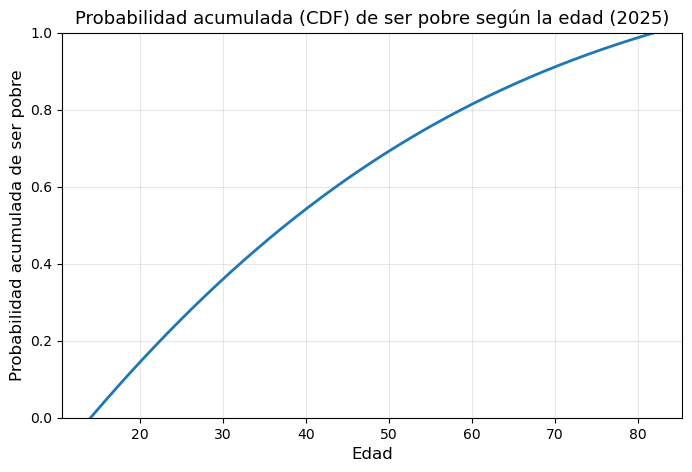

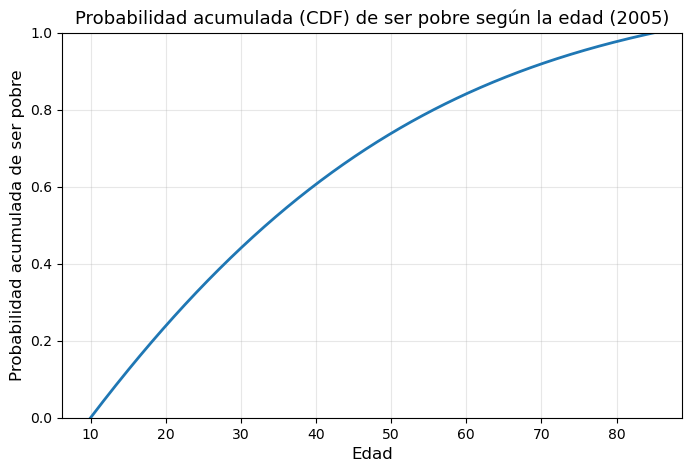

In [25]:
# 4. Probabildiad a
# Visualización 2025
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Variable numérica: edad ---
var = "ch06"  # edad

# Columnas EXACTAS del modelo 2025 (orden correcto)
cols_2025 = res_2025.model.exog_names
X_train_cols = X_train_2025[cols_2025].copy()

# Rango de edad (denso para suavidad)
x_range = np.linspace(X_train_cols[var].min(), X_train_cols[var].max(), 400)

# Punto de referencia: promedios de TODAS las variables del modelo (incluye dummies e intercepto)
X_base = pd.DataFrame([X_train_cols.mean(numeric_only=True)], columns=cols_2025)

# Matriz de predicción: variamos SOLO la edad
X_pred = pd.concat([X_base] * len(x_range), ignore_index=True)
X_pred[var] = x_range

# Probabilidad predicha P(Y=1|X) del modelo 2025
p_hat = res_2025.predict(X_pred[cols_2025]).values

# ---- Probabilidad acumulada sobre el eje edad (CDF de la curva p_hat) ----
# Integral acumulada con regla trapezoidal, normalizada a [0,1]
dx = np.diff(x_range)
area_cum = np.cumsum((p_hat[:-1] + p_hat[1:]) / 2 * dx)
cdf = np.concatenate([[0.0], area_cum / area_cum[-1]])

# --- Graficar ---
plt.figure(figsize=(8,5))
plt.plot(x_range, cdf, linewidth=2)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Probabilidad acumulada de ser pobre", fontsize=12)
plt.title("Probabilidad acumulada (CDF) de ser pobre según la edad (2025)", fontsize=13)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.show()

# Visualización 2005
cols_2005 = res_2005.model.exog_names
X_train_cols = X_train_2005[cols_2005].copy()

# Rango de edad (denso para suavidad)
x_range = np.linspace(X_train_cols[var].min(), X_train_cols[var].max(), 400)

# Punto de referencia: promedios de TODAS las variables del modelo (incluye dummies e intercepto)
X_base = pd.DataFrame([X_train_cols.mean(numeric_only=True)], columns=cols_2025)

# Matriz de predicción: variamos SOLO la edad
X_pred = pd.concat([X_base] * len(x_range), ignore_index=True)
X_pred[var] = x_range

# Probabilidad predicha P(Y=1|X) del modelo 2025
p_hat = res_2005.predict(X_pred[cols_2005]).values

# ---- Probabilidad acumulada sobre el eje edad (CDF de la curva p_hat) ----
# Integral acumulada con regla trapezoidal, normalizada a [0,1]
dx = np.diff(x_range)
area_cum = np.cumsum((p_hat[:-1] + p_hat[1:]) / 2 * dx)
cdf = np.concatenate([[0.0], area_cum / area_cum[-1]])

# --- Graficar ---
plt.figure(figsize=(8,5))
plt.plot(x_range, cdf, linewidth=2)
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Probabilidad acumulada de ser pobre", fontsize=12)
plt.title("Probabilidad acumulada (CDF) de ser pobre según la edad (2005)", fontsize=13)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.show()

# Parte C: Método de Vecinos Cercanos (KNN)

### 5)

- creamos una función knn_clasificar que entrena modelos KNN con distintos valores de K (1, 5 y 10)
- preparamos la base con preparar_X_knn, que estandariza la edad y convierte las variables categóricas en dummies (una menos para evitar redundancia)
- aplicamos el modelo a los datos de 2005 y 2025, y contamos cuántos hogares fueron clasificados como pobres o no pobres
- comparamos cómo cambia la clasificación al aumentar el número de vecinos y analizamos el patrón de sesgo–varianza
- usamos la misma estructura de variables y escalas para ambos años, así los resultados son comparables

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# preparar X (dummies fijas + estandarizar edad)
def preparar_X_knn(df):
    df = df.copy()
    if 'intercept' in df.columns:
        df = df.drop(columns=['intercept'])

    num_col = 'ch06'
    cat_cols = ['ch04', 'ch07', 'nivel_ed', 'estado']

    # escalar edad
    if num_col in df.columns:
        scaler = StandardScaler()
        df[num_col] = scaler.fit_transform(df[[num_col]])

    # categorías fijas (predefinidas manualmente)
    categorias_fijas = {
        'ch04': [1.0, 2.0],
        'ch07': [1.0, 2.0, 3.0, 4.0, 5.0],
        'nivel_ed': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
        'estado': [1.0, 2.0, 3.0, 4.0]
    }

    # referencia fija
    ref_dict = {'ch04': 1.0, 'ch07': 2.0, 'nivel_ed': 1.0, 'estado': 2.0}

    # crear dummies aunque no aparezcan
    for col in cat_cols:
        if col not in df.columns:
            continue
        for cat in categorias_fijas[col]:
            if cat != ref_dict[col]:
                new_col = f"{col}_{cat}"
                df[new_col] = (df[col] == cat).astype(int)
                # si la categoría no existe, se completa con 0
                if df[new_col].isna().any():
                    df[new_col] = 0

    X = df.drop(columns=[c for c in cat_cols if c in df.columns])

    # rellenar columnas faltantes (si alguna no se creó)
    todas_cols = []
    for c in cat_cols:
        for cat in categorias_fijas[c]:
            if cat != ref_dict[c]:
                todas_cols.append(f"{c}_{cat}")
    for col in todas_cols:
        if col not in X.columns:
            X[col] = 0

    X = X[['ch06'] + todas_cols]  # asegurar mismo orden

    # chequeo
    print("\nVariables finales en X:")
    print(X.columns.tolist())
    print(f"Total de columnas: {len(X.columns)}")
    return X


# función que entrena KNN con distintos K
def knn_clasificar(X_train, y_train, ks=(1,5,10)):
    preds = {}
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds[k] = knn.predict(X_train)
    return preds


# --- Año 2025 ---
print("base 2025")
X_train_2025_pre = preparar_X_knn(X_train_2025)
preds_2025 = knn_clasificar(X_train_2025_pre, y_train_2025)
for k in [1,5,10]:
    conteo = pd.Series(preds_2025[k]).value_counts().sort_index()
    print(f"\n[NOA 2025 | K={k}]")
    print(f"No pobres (0): {conteo.get(0,0)}")
    print(f"Pobres (1):    {conteo.get(1,0)}")

# --- Año 2005 ---
print("base 2005")
X_train_2005_pre = preparar_X_knn(X_train_2005)
preds_2005 = knn_clasificar(X_train_2005_pre, y_train_2005)
for k in [1,5,10]:
    conteo = pd.Series(preds_2005[k]).value_counts().sort_index()
    print(f"\n[NOA 2005 | K={k}]")
    print(f"No pobres (0): {conteo.get(0,0)}")
    print(f"Pobres (1):    {conteo.get(1,0)}")

base 2025

Variables finales en X:
['ch06', 'ch04_2.0', 'ch07_1.0', 'ch07_3.0', 'ch07_4.0', 'ch07_5.0', 'nivel_ed_2.0', 'nivel_ed_3.0', 'nivel_ed_4.0', 'nivel_ed_5.0', 'nivel_ed_6.0', 'nivel_ed_7.0', 'estado_1.0', 'estado_3.0', 'estado_4.0']
Total de columnas: 15

[NOA 2025 | K=1]
No pobres (0): 1716
Pobres (1):    1123

[NOA 2025 | K=5]
No pobres (0): 1854
Pobres (1):    985

[NOA 2025 | K=10]
No pobres (0): 2191
Pobres (1):    648
base 2005

Variables finales en X:
['ch06', 'ch04_2.0', 'ch07_1.0', 'ch07_3.0', 'ch07_4.0', 'ch07_5.0', 'nivel_ed_2.0', 'nivel_ed_3.0', 'nivel_ed_4.0', 'nivel_ed_5.0', 'nivel_ed_6.0', 'nivel_ed_7.0', 'estado_1.0', 'estado_3.0', 'estado_4.0']
Total de columnas: 15

[NOA 2005 | K=1]
No pobres (0): 1695
Pobres (1):    1002

[NOA 2005 | K=5]
No pobres (0): 1783
Pobres (1):    914

[NOA 2005 | K=10]
No pobres (0): 1895
Pobres (1):    802


- chequeo que se hayan creado bien las variables por columna (todas las variables)

In [27]:
import numpy as np

def listar_valores(df, nombre_df):
    print(f"\n=== {nombre_df} ===")
    for col in df.columns:
        s = df[col].dropna()
        u = np.sort(s.unique())
        # si tiene pocos valores, los listamos directamente
        if s.nunique() <= 10:
            print(f"{col}: {u.tolist()}")
        else:
            # si tiene muchos (variable continua), mostramos resumen
            print(f"{col}: {s.nunique()} valores únicos | min={s.min():.3f}, max={s.max():.3f}, media={s.mean():.3f}, desvío={s.std():.3f}")

# correr para 2025 (13 columnas)
listar_valores(X_train_2025_pre, "X_train_2025_pre")
listar_valores(X_train_2005_pre, "X_train_2005_pre")


=== X_train_2025_pre ===
ch06: 69 valores únicos | min=-2.051, max=3.259, media=0.000, desvío=1.000
ch04_2.0: [0]
ch07_1.0: [0]
ch07_3.0: [0.0, 1.0]
ch07_4.0: [0.0, 1.0]
ch07_5.0: [0.0, 1.0]
nivel_ed_2.0: [0, 1]
nivel_ed_3.0: [0, 1]
nivel_ed_4.0: [0, 1]
nivel_ed_5.0: [0, 1]
nivel_ed_6.0: [0, 1]
nivel_ed_7.0: [0, 1]
estado_1.0: [0]
estado_3.0: [0]
estado_4.0: [0]

=== X_train_2005_pre ===
ch06: 69 valores únicos | min=-2.075, max=3.599, media=0.000, desvío=1.000
ch04_2.0: [0]
ch07_1.0: [0]
ch07_3.0: [0.0, 1.0]
ch07_4.0: [0.0, 1.0]
ch07_5.0: [0.0, 1.0]
nivel_ed_2.0: [0, 1]
nivel_ed_3.0: [0, 1]
nivel_ed_4.0: [0, 1]
nivel_ed_5.0: [0, 1]
nivel_ed_6.0: [0, 1]
nivel_ed_7.0: [0, 1]
estado_1.0: [0]
estado_3.0: [0]
estado_4.0: [0]


- la matriz final contiene 15 variables: una numérica (ch06, edad estandarizada) y 14 dummies derivadas de ch04 (sexo), ch07 (estado civil), nivel_ed (nivel educativo) y estado (condición de actividad)
Algunas columnas toman solo el valor 0 porque ciertas categorías no aparecen en la región o año analizado (por ejemplo, “menor de 10 años” o “unido”).
- Esto se debe a que se forzó la creación de todas las categorías posibles para mantener la misma estructura entre 2005 y 2025, no afecta al modelo KNN, ya que las variables constantes no influyen en las distancias

### 6)

- seleccionamos dos variables continuas (edad e ingreso per cápita familiar) para representar el espacio de decisión
- transformamos el ingreso aplicando log(1 + ipcf) para reducir la asimetría de los datos
- estandarizamos ambas variables para que la distancia en KNN no dependa de las unidades originales
- entrenamos modelos KNN con K = 1, 5 y 10 y graficamos sus fronteras de decisión
- visualizamos los resultados para los años 2005 y 2025, mostrando cómo el modelo separa hogares pobres y no pobres

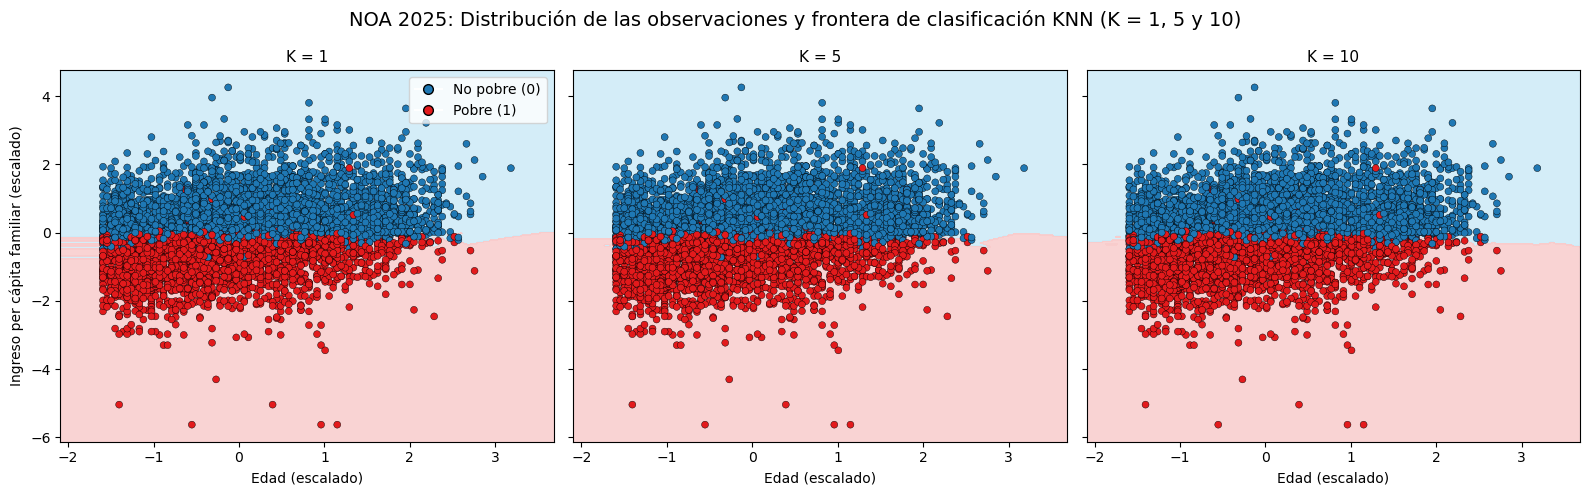

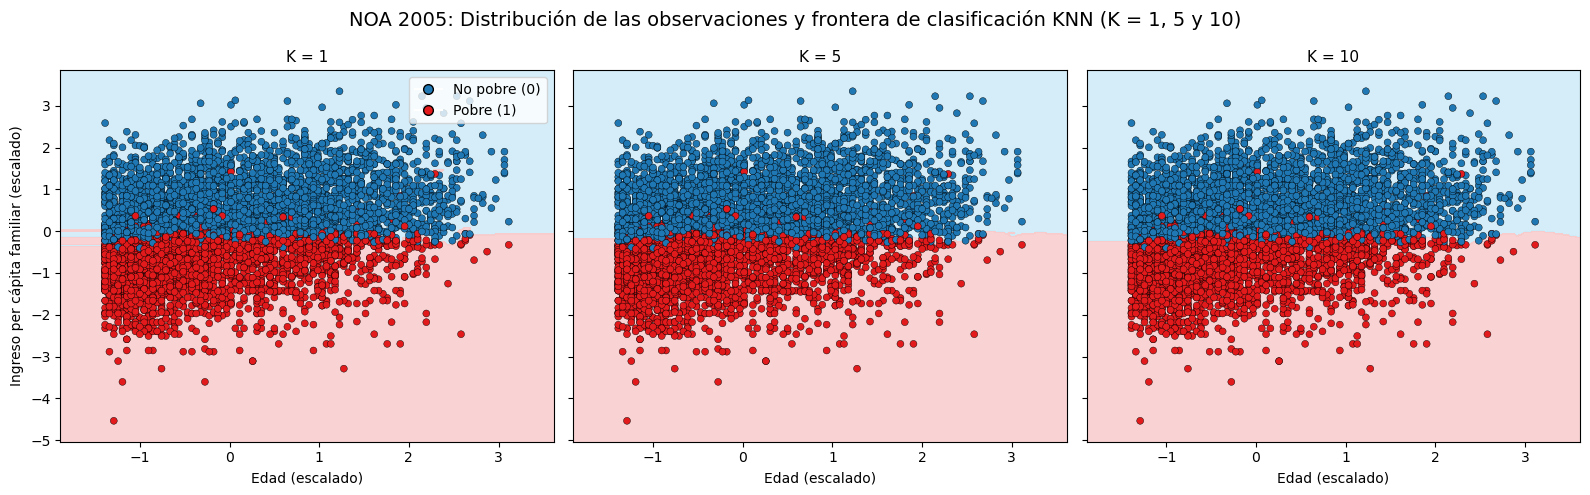

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_knn_frontiers_for_year(df, year_label="NOA 2025"):
    # seleccionamos edad e ingreso
    X_cont = df[['ch06', 'ipcf']].copy()
    y_cont = df['pobre'].astype(int).copy()

    # aplicamos log(1 + ipcf)
    X_cont['ipcf_log'] = np.log1p(X_cont['ipcf'])
    X_cont = X_cont[['ch06', 'ipcf_log']].dropna()
    y_vec = y_cont.loc[X_cont.index].values

    # escalamos variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cont)

    # generamos un conjunto de puntos sobre el espacio de las variables que permitirá visualizar la frontera entre clases
    x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
    y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # graficamos fronteras KNN para K=1,5,10
    fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
    ks = [1, 5, 10]
    cmap_regions = ListedColormap(['#CDEAF7', '#F9CCCC'])
    cmap_points  = ListedColormap(['#1F78B4', '#E31A1C'])

    # título claro y formal
    fig.suptitle(f"{year_label}: Distribución de las observaciones y frontera de clasificación KNN (K = 1, 5 y 10)",
                 fontsize=14, y=0.98)

    for ax, k in zip(axes, ks):
        knn = KNeighborsClassifier(n_neighbors=k)  # modelo KNN
        knn.fit(X_scaled, y_vec)                   # entrenamiento
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

        # graficamos puntos y frontera
        ax.contourf(xx, yy, Z, cmap=cmap_regions, alpha=0.85)
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vec, cmap=cmap_points,
                   edgecolor='k', s=25, linewidth=0.3)

        # título breve por panel
        ax.set_title(f"K = {k}", fontsize=11)

    # etiquetas de ejes
    for ax in axes:
        ax.set_xlabel('Edad (escalado)')
    axes[0].set_ylabel('Ingreso per cápita familiar (escalado)')

    # leyenda
    handles = [
        plt.Line2D([0], [0], marker='o', color='w',
                   markerfacecolor=cmap_points(0), markeredgecolor='k',
                   markersize=7, label='No pobre (0)'),
        plt.Line2D([0], [0], marker='o', color='w',
                   markerfacecolor=cmap_points(1), markeredgecolor='k',
                   markersize=7, label='Pobre (1)')
    ]
    axes[0].legend(handles=handles, loc='upper right', frameon=True)

    # disposición final
    fig.subplots_adjust(top=0.86, wspace=0.08)
    plt.tight_layout()
    plt.show()

# ejecutamos para ambos años
plot_knn_frontiers_for_year(train_2025, year_label='NOA 2025')
plot_knn_frontiers_for_year(train_2005, year_label='NOA 2005')

### 7)

- usamos respondieron_2025 y preparamos las variables igual que en el Ejercicio 5 (edad estandarizada y dummies)
- probamos valores de K del 1 al 50 usando validación cruzada con 5 particiones
- calculamos el accuracy promedio en cada caso y elegimos el K que da mejor desempeño (K óptimo)
- mostramos un gráfico con el accuracy promedio por K, donde se ve claramente el punto óptimo
- entrenamos el modelo final con ese K óptimo, llamado “KNN con K-CV”, para usarlo después en las predicciones


Variables finales en X:
['ch06', 'ch04_2.0', 'ch07_1.0', 'ch07_3.0', 'ch07_4.0', 'ch07_5.0', 'nivel_ed_2.0', 'nivel_ed_3.0', 'nivel_ed_4.0', 'nivel_ed_5.0', 'nivel_ed_6.0', 'nivel_ed_7.0', 'estado_1.0', 'estado_3.0', 'estado_4.0']
Total de columnas: 15

K óptimo según CV(5): 49
Accuracy promedio en CV: 0.6586
Rango de K evaluado: 1..60 (impares)


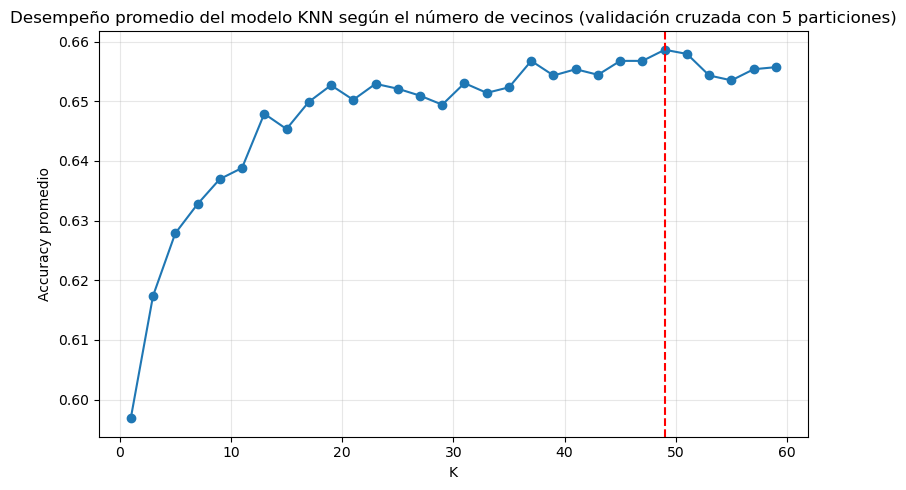

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# preparar X como en el ejercicio 5
def preparar_X_knn(df, feature_cols, target_col=None):
    df = df[feature_cols + [target_col]].copy()
    df['ch06'] = pd.to_numeric(df['ch06'], errors='coerce')

    categorias_fijas = {
        'ch04': [1.0, 2.0],
        'ch07': [1.0, 2.0, 3.0, 4.0, 5.0],
        'nivel_ed': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
        'estado': [1.0, 2.0, 3.0, 4.0]
    }
    ref_dict = {'ch04': 1.0, 'ch07': 2.0, 'nivel_ed': 1.0, 'estado': 2.0}

    for col in [c for c in ['ch04', 'ch07', 'nivel_ed', 'estado'] if c in df.columns]:
        for cat in categorias_fijas[col]:
            if cat != ref_dict[col]:
                df[f"{col}_{cat}"] = (pd.to_numeric(df[col], errors='coerce') == cat).astype(int)
                if df[f"{col}_{cat}"].isna().any():
                    df[f"{col}_{cat}"] = 0
        df = df.drop(columns=col)

    df = df.dropna()

    #escalamos dentro del Pipeline

    X = df.drop(columns=[target_col], errors='ignore')
    idx = X.index

    todas_cols = ['ch06']
    for c in ['ch04', 'ch07', 'nivel_ed', 'estado']:
        for cat in categorias_fijas[c]:
            if cat != ref_dict[c]:
                todas_cols.append(f"{c}_{cat}")
    for col in todas_cols:
        if col not in X.columns:
            X[col] = 0
    X = X[todas_cols]

    print("\nVariables finales en X:")
    print(X.columns.tolist())
    print("Total de columnas:", X.shape[1])
    return X, idx


# ej 7
feature_cols = ['ch04', 'ch06', 'ch07', 'nivel_ed', 'estado']
target_col = 'pobre'

X, idx = preparar_X_knn(respondieron_2025, feature_cols, target_col)
y = respondieron_2025.loc[idx, target_col].astype(int)

# Pipeline --> escalamos ch06 dentro de cada fold
num_cols = ['ch06']
prepro = ColumnTransformer([('scale_num', StandardScaler(), num_cols)],
                           remainder='passthrough')
pipe = Pipeline([('prep', prepro), ('knn', KNeighborsClassifier())])

cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# grid de 60 K
k_grid = list(range(1, 61, 2))

gcv = GridSearchCV(pipe, {'knn__n_neighbors': k_grid}, cv=cv5,
                   scoring='accuracy', n_jobs=-1, refit=True)
gcv.fit(X, y)

cv_results = pd.DataFrame(gcv.cv_results_)
cv_results['K'] = cv_results['param_knn__n_neighbors'].astype(int)
cv_results = cv_results.sort_values('K')

best_k = gcv.best_params_['knn__n_neighbors']
best_acc = gcv.best_score_

print(f"\nK óptimo según CV(5): {best_k}")
print(f"Accuracy promedio en CV: {best_acc:.4f}")
print("Rango de K evaluado: 1..60 (impares)")

plt.figure(figsize=(8,5))
plt.plot(cv_results['K'], cv_results['mean_test_score'], marker='o')
plt.axvline(best_k, linestyle='--', color='red')
plt.title('Desempeño promedio del modelo KNN según el número de vecinos (validación cruzada con 5 particiones)')
plt.xlabel('K')
plt.ylabel('Accuracy promedio')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

knn_kcv = gcv.best_estimator_

- Para que el modelo no use información que no le corresponde, la estandarización de la variable ch06 se hace dentro del Pipeline. Así, en cada división de la validación cruzada el modelo escala la edad sólo con los datos de entrenamiento y no con todos los datos.

# Parte D: Desempeño de modelos, elección y predicción afuera de la muestra

Columnas usadas por Logit: 9
['ch04', 'ch06', 'nivel_ed', 'ch07_2.0', 'ch07_3.0', 'ch07_4.0', 'ch07_5.0', 'estado_2.0', 'intercept']
Columnas usadas por KNN: 15
['ch06' 'ch04_2.0' 'ch07_1.0' 'ch07_3.0' 'ch07_4.0' 'ch07_5.0'
 'nivel_ed_2.0' 'nivel_ed_3.0' 'nivel_ed_4.0' 'nivel_ed_5.0'
 'nivel_ed_6.0' 'nivel_ed_7.0' 'estado_1.0' 'estado_3.0' 'estado_4.0']


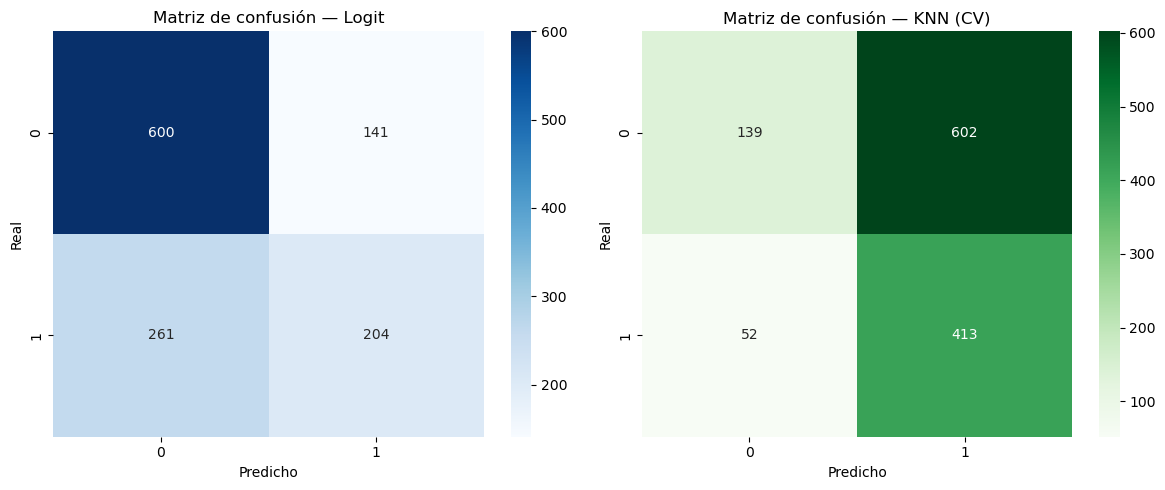

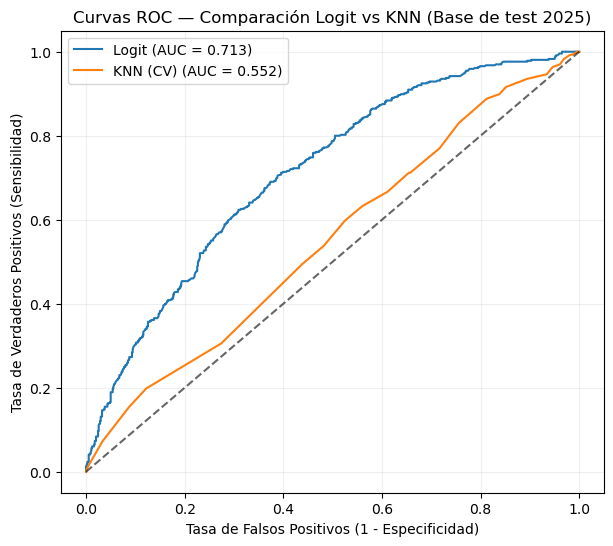

=== Métricas de desempeño en la base de test (2025) ===


,Modelo,Accuracy,Sensibilidad (Recall)
0,Logit,0.667,0.439
1,KNN (CV),0.458,0.888


In [31]:
#8)
# Comparación de desempeño Logit vs KNN (con CV)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, roc_auc_score,
    accuracy_score, recall_score
)

# Alinear columnas del test con cada modelo 

# KNN
cols_knn = knn_kcv.feature_names_in_
for col in cols_knn:
    if col not in X_test_2025.columns:
        X_test_2025[col] = 0
X_test_knn = X_test_2025[cols_knn].copy()

# LOGIT
cols_logit = res_2025.model.exog_names
X_test_logit = X_test_2025[[c for c in cols_logit if c in X_test_2025.columns]].copy()

y_test = y_test_2025.copy()

print("Columnas usadas por Logit:", len(cols_logit))
print(cols_logit)
print("Columnas usadas por KNN:", len(cols_knn))
print(cols_knn)

# Predicciones
pred_proba_logit = res_2025.predict(X_test_logit)
pred_proba_knn   = knn_kcv.predict_proba(X_test_knn)[:, 1]

# Clasificación binaria con umbral 0.5
pred_logit = (pred_proba_logit > 0.5).astype(int)
pred_knn   = (pred_proba_knn > 0.5).astype(int)

# Matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, pred_logit), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Matriz de confusión — Logit")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Matriz de confusión — KNN (CV)")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

# Curva ROC
fpr_logit, tpr_logit, _ = roc_curve(y_test, pred_proba_logit)
fpr_knn, tpr_knn, _     = roc_curve(y_test, pred_proba_knn)

plt.figure(figsize=(7,6))
plt.plot(fpr_logit, tpr_logit, label=f"Logit (AUC = {roc_auc_score(y_test, pred_proba_logit):.3f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (CV) (AUC = {roc_auc_score(y_test, pred_proba_knn):.3f})")
plt.plot([0,1], [0,1], 'k--', alpha=0.6)
plt.xlabel("Tasa de Falsos Positivos (1 - Especificidad)")
plt.ylabel("Tasa de Verdaderos Positivos (Sensibilidad)")
plt.title("Curvas ROC — Comparación Logit vs KNN (Base de test 2025)")
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Métricas de desempeño
metricas = pd.DataFrame({
    "Modelo": ["Logit", "KNN (CV)"],
    "Accuracy": [
        accuracy_score(y_test, pred_logit),
        accuracy_score(y_test, pred_knn)
    ],
    "Sensibilidad (Recall)": [
        recall_score(y_test, pred_logit),
        recall_score(y_test, pred_knn)
    ]
}).round(3)

print("=== Métricas de desempeño en la base de test (2025) ===")
display(metricas)


In [32]:
#10)
# Predicción en NORESPONDIERON 2025 con el modelo elegido (KNN con CV) ===
import numpy as np
import pandas as pd

# 1) Tomamos las columnas EXACTAS que el KNN espera (las mismas que usó al entrenar)
cols_knn = knn_kcv.feature_names_in_

# 2) Partimos de la base norespondieron_2025
X_nor_2025 = norespondieron_2025.copy()

# Asegurar que 'ch06' sea numérica (por las dudas)
if 'ch06' in X_nor_2025.columns:
    X_nor_2025['ch06'] = pd.to_numeric(X_nor_2025['ch06'], errors='coerce')

# 3) Si faltan columnas que el modelo espera, las creamos en 0 (equivalente a “categoría ausente”)
for col in cols_knn:
    if col not in X_nor_2025.columns:
        X_nor_2025[col] = 0

# 4) Subset y orden en el mismo orden del entrenamiento
X_nor_2025 = X_nor_2025[cols_knn].copy()

# 5) Predicción de probabilidad y etiqueta (umbral 0.5)
proba_pobre_nor = knn_kcv.predict_proba(X_nor_2025)[:, 1]
pred_pobre_nor  = (proba_pobre_nor > 0.5).astype(int)

# 6) Métrica pedida: proporción de personas identificadas como pobres
prop_pobres_nor_2025 = pred_pobre_nor.mean()

# 7) anexar resultados a la base original para inspección/exportar
norespondieron_2025_pred = norespondieron_2025.copy()
norespondieron_2025_pred['proba_pobre'] = proba_pobre_nor
norespondieron_2025_pred['pred_pobre']  = pred_pobre_nor

# 8) Reporte
n_total = len(pred_pobre_nor)
n_pobres = pred_pobre_nor.sum()
print(f"Total personas (norespondieron 2025): {n_total}")
print(f"Identificadas como pobres (pred=1):   {n_pobres}")
print(f"Proporción identificada como pobre:   {prop_pobres_nor_2025:.3%}")

# Mirar algunas filas
norespondieron_2025_pred[['proba_pobre', 'pred_pobre']].head()


Total personas (norespondieron 2025): 1035
Identificadas como pobres (pred=1):   816
Proporción identificada como pobre:   78.841%


,proba_pobre,pred_pobre
9027,0.714286,1
9103,0.714286,1
9131,0.591837,1
9132,0.693878,1
9133,0.857143,1
